In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.model_selection
import tensorflow as tf

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


---
# Load the data
---

In [8]:
npzfile = np.load('./gdrive/MyDrive/X_and_y.npz')
npztest = np.load('./gdrive/MyDrive/test_images.npz')
X = npzfile['X']
y = npzfile['y']

y_test = npztest['X']

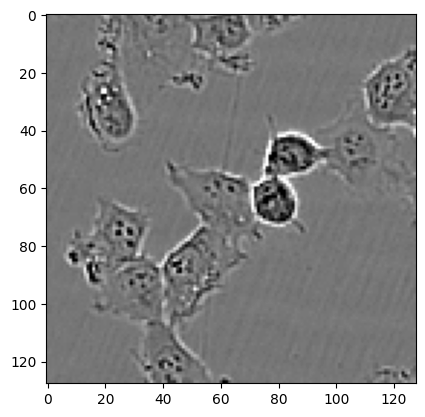

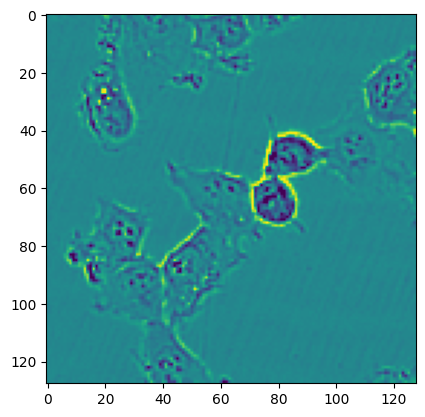

In [10]:
idx = 7
plt.imshow(y_test[4]/255, cmap = 'gray')


plt.figure()
plt.imshow(y_test[4]/255)

---
# Train Test Split
---

In [11]:
X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, random_state = 123)

In [12]:
data_train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(16)
data_val = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(16)

In [13]:
for img, mask in data_val:
  print(img.shape)
  print(mask.shape)
  break

(16, 128, 128)
(16, 128, 128)


---
# U-Net Architecture
---

In [ ]:
inputs = tf.keras.Input(shape=(128,128,1))

# Downsample + Maxpooling - 64 filters
a = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(inputs)
print(a.shape)
a_ = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(a)
print(a_.shape)
a = tf.keras.layers.MaxPool2D(pool_size=(2,2))(a_)
print(a.shape)

(None, 128, 128, 64)
(None, 128, 128, 64)
(None, 64, 64, 64)


In [ ]:
# Downsample + Maxpooling - 128 filters
b = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(a)
b_ = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(b)
b = tf.keras.layers.MaxPool2D(pool_size=(2,2))(b_)
print(b_.shape)
print(b.shape)

(None, 64, 64, 128)
(None, 32, 32, 128)


In [ ]:
# Downsample + Maxpooling - 256 filters
c = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')(b)
c_ = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')(c)
c = tf.keras.layers.MaxPool2D(pool_size=(2,2))(c_)
print(c_.shape)
print(c.shape)

(None, 32, 32, 256)
(None, 16, 16, 256)


In [ ]:
# Downsample + Maxpooling - 512 filters
d = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same')(c)
d_ = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same')(d)
d = tf.keras.layers.MaxPool2D(pool_size=(2,2))(d_)
print(d_.shape)
print(d.shape)

(None, 16, 16, 512)
(None, 8, 8, 512)


In [ ]:
# Downsample - 1024 filters
e = tf.keras.layers.Conv2D(filters=1024, kernel_size=(3,3), activation='relu', padding='same')(d)
e = tf.keras.layers.Conv2D(filters=1024, kernel_size=(3,3), activation='relu', padding='same')(e)
print(e.shape)

(None, 8, 8, 1024)


In [ ]:
# Upsampling + Convolution + Concatenation + Convolution - 512 filters
dU = tf.keras.layers.UpSampling2D(size=(2,2))(e)
#print(e.shape)
dU = tf.keras.layers.Conv2D(filters = 512, kernel_size=(2,2), activation='relu', padding='same')(dU)
print(dU.shape)
dU = tf.keras.layers.concatenate([dU, d_])
print(dU.shape)
dU = tf.keras.layers.Conv2D(filters = 512, kernel_size=(3,3), activation='relu', padding='same')(dU)
dU = tf.keras.layers.Conv2D(filters = 512, kernel_size=(3,3), activation='relu', padding='same')(dU)
print(dU.shape)

(None, 16, 16, 512)
(None, 16, 16, 1024)
(None, 16, 16, 512)


In [ ]:
# Upsampling + Convolution + Concatenation + Convolution - 256 filters
cU = tf.keras.layers.UpSampling2D(size=(2,2))(dU)
print(cU.shape)
cU = tf.keras.layers.Conv2D(filters = 256, kernel_size=(2,2), activation='relu', padding='same')(cU)
cU = tf.keras.layers.concatenate([cU, c_])
print(cU.shape)
cU = tf.keras.layers.Conv2D(filters = 256, kernel_size=(3,3), activation='relu', padding='same')(cU)
cU = tf.keras.layers.Conv2D(filters = 256, kernel_size=(3,3), activation='relu', padding='same')(cU)
print(cU.shape)

(None, 32, 32, 512)
(None, 32, 32, 512)
(None, 32, 32, 256)


In [ ]:
# Upsampling + Convolution + Concatenation + Convolution - 128 filters
bU = tf.keras.layers.UpSampling2D(size=(2,2))(cU)
print(bU.shape)
bU = tf.keras.layers.Conv2D(filters = 128, kernel_size=(2,2), activation='relu', padding='same')(bU)
bU = tf.keras.layers.concatenate([bU, b_])
bU = tf.keras.layers.Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='same')(bU)
bU = tf.keras.layers.Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='same')(bU)
bU.shape

(None, 64, 64, 256)


TensorShape([None, 64, 64, 128])

In [ ]:
# Upsampling + Convolution + Concatenation + Convolution - 64 filters
aU = tf.keras.layers.UpSampling2D(size=(2,2))(bU)
print(aU.shape)
aU = tf.keras.layers.Conv2D(filters = 64, kernel_size=(2,2), activation='relu', padding='same')(aU)
print(a_.shape)
aU = tf.keras.layers.concatenate([aU, a_])
aU = tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same')(aU)
aU = tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same')(aU)
aU.shape

(None, 128, 128, 128)
(None, 128, 128, 64)


TensorShape([None, 128, 128, 64])

In [ ]:
#x = tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', padding='same')(x)
outputs = tf.keras.layers.Conv2D(filters=1,kernel_size=(1,1), activation='sigmoid', padding='same')(aU)

#outputs = tf.keras.layers.Conv2D(filters=1,kernel_size=(1,1), activation='sigmoid', padding='same')(outputs)
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(outputs)
outputs.shape

TensorShape([None, 128, 128, 1])

In [ ]:
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

---
# Model Training
---

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(data_train, epochs=50, validation_data=data_val)

Epoch 1/50
94/94 [==============================] - 31s 187ms/step - loss: 0.6970 - accuracy: 0.6653 - val_loss: 0.6861 - val_accuracy: 0.7266
Epoch 2/50
94/94 [==============================] - 16s 168ms/step - loss: 0.6851 - accuracy: 0.7155 - val_loss: 0.8137 - val_accuracy: 0.2799
Epoch 3/50
94/94 [==============================] - 16s 168ms/step - loss: 0.6700 - accuracy: 0.7629 - val_loss: 0.6631 - val_accuracy: 0.7808
Epoch 4/50
94/94 [==============================] - 16s 168ms/step - loss: 0.6569 - accuracy: 0.7951 - val_loss: 0.6546 - val_accuracy: 0.7976
Epoch 5/50
94/94 [==============================] - 16s 168ms/step - loss: 0.6500 - accuracy: 0.8056 - val_loss: 0.6471 - val_accuracy: 0.8115
Epoch 6/50
94/94 [==============================] - 16s 167ms/step - loss: 0.6444 - accuracy: 0.8124 - val_loss: 0.6456 - val_accuracy: 0.8056
Epoch 7/50
94/94 [==============================] - 16s 167ms/step - loss: 0.6400 - accuracy: 0.8154 - val_loss: 0.6373 - val_accuracy: 0.8204

---
# Model Evaluation and Prediction
---

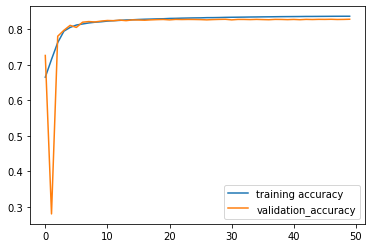

In [ ]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(train_accuracy, label = 'training accuracy')
plt.plot(val_accuracy, label = 'validation_accuracy')
plt.legend()

In [ ]:
count = []
pred_mask = model.predict(y_test)
pred_mask = pred_mask.round()
pred_mask = pred_mask.astype(np.uint8)
import cv2

for idx in range(2000):
  img = pred_mask[idx,:,:,0]
  ret,_ = cv2.connectedComponents(img)
  count.append(ret)

In [ ]:
index = []
for i in range(2000):
  index.append(i)

In [ ]:
import pandas as pd
kaggle_submission = pd.DataFrame(index, columns = ['index'])
kaggle_submission['count'] = count
fname_submission = 'unet_kaggle_826.csv'
kaggle_submission.to_csv( fname_submission, index = False)

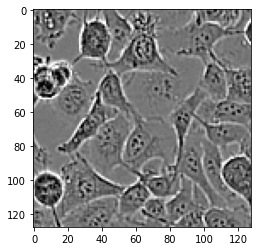

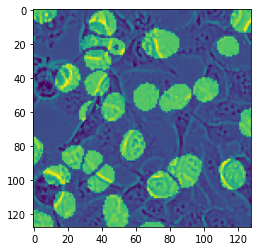

In [ ]:
import matplotlib.pyplot as plt
idx = 7
plt.imshow(y_test[511]/255, cmap = 'gray')


plt.figure()
plt.imshow(y_test[511]/255 + pred_mask[1700,:,:,0])